<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Biomat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Dataset_01_22_2018.xlsx")

In [7]:
df.head()

,ID_sequencing,ID_Environmental,Longitude,Latitude,Continent,Clay_silt,Soil_C,Soil_N,Soil_P,Soil_C_N_ratio,...,Grassland,Shrubland,UV_Light,NPP2003_2015,Ecosystem_type,Low_pH_cluster,Drylands_cluster,High_pH_cluster,Dry_forest_cluster,Low_productivity_cluster
0,1,1,-54.683333,-26.733333,South_america,82.0,1.771,0.248,559.298,7.144,...,0,0,10.525,0.819973,Temperate forests,-0.203029,-0.692027,-0.457046,-0.519431,-0.698867
1,2,2,-148.250000,64.800000,North_America,80.0,3.217,0.156,911.506,20.597,...,0,0,2.322,0.380480,Boreal,0.279473,-0.740384,-0.730829,-0.323655,-0.730370
2,3,3,-72.190000,42.530000,North_America,42.0,34.772,1.398,1269.108,24.881,...,0,0,5.407,0.658017,Cold forests,0.288032,-0.765861,-0.721772,-0.671151,-0.730370
3,4,4,-96.570000,39.090000,North_America,35.8,5.931,0.585,763.273,10.142,...,0,0,6.410,0.475787,Temperate forests,-0.387621,-0.586796,0.216583,-0.492100,-0.686480
4,5,5,-122.260000,44.210000,North_America,28.2,9.713,0.895,1702.348,10.850,...,1,0,6.029,0.779492,Grasslands,0.553378,-0.703947,-0.646651,-0.164321,-0.375900


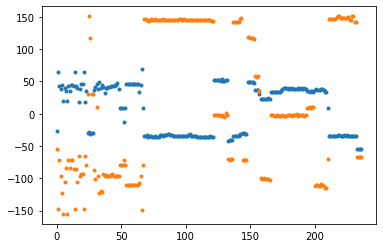

In [8]:
plt.plot(df['Latitude'],'.')
plt.plot(df['Longitude'],'.')
plt.show()

In [14]:
df.head()

,ID_sequencing,ID_Environmental,Longitude,Latitude,Continent,Clay_silt,Soil_C,Soil_N,Soil_P,Soil_C_N_ratio,...,Grassland,Shrubland,UV_Light,NPP2003_2015,Ecosystem_type,Low_pH_cluster,Drylands_cluster,High_pH_cluster,Dry_forest_cluster,Low_productivity_cluster
0,1,1,-54.683333,-26.733333,South_america,82.0,1.771,0.248,559.298,7.144,...,0,0,10.525,0.819973,Temperate forests,-0.203029,-0.692027,-0.457046,-0.519431,-0.698867
1,2,2,-148.250000,64.800000,North_America,80.0,3.217,0.156,911.506,20.597,...,0,0,2.322,0.380480,Boreal,0.279473,-0.740384,-0.730829,-0.323655,-0.730370
2,3,3,-72.190000,42.530000,North_America,42.0,34.772,1.398,1269.108,24.881,...,0,0,5.407,0.658017,Cold forests,0.288032,-0.765861,-0.721772,-0.671151,-0.730370
3,4,4,-96.570000,39.090000,North_America,35.8,5.931,0.585,763.273,10.142,...,0,0,6.410,0.475787,Temperate forests,-0.387621,-0.586796,0.216583,-0.492100,-0.686480
4,5,5,-122.260000,44.210000,North_America,28.2,9.713,0.895,1702.348,10.850,...,1,0,6.029,0.779492,Grasslands,0.553378,-0.703947,-0.646651,-0.164321,-0.375900


['Boreal' 'Cold forests' 'Cold grasslands' 'Dry forests' 'Dry grasslands'
 'Grasslands' 'Shrublands' 'Temperate forests' 'Tropical forests']


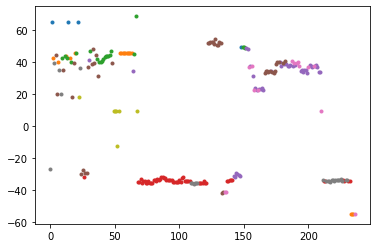

In [27]:
import numpy as np
ecoss=np.unique(df['Ecosystem_type'])
print(ecoss)
for eco in ecoss:
    subbase_Ecos_type=df[df['Ecosystem_type']==eco]
    plt.plot(subbase_Ecos_type['Latitude'],'.',label='lat-'+eco)
plt.show()

In [21]:
subbase_Ecos_type=df[df['Ecosystem_type']=='Temperate forests']

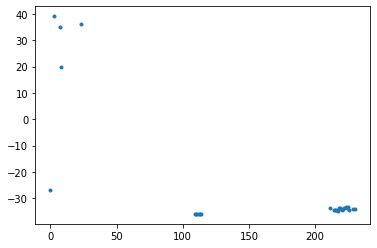

In [20]:
plt.plot(subbase_Ecos_type['Latitude'],'.')

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df2 = pd.DataFrame(df, columns=['Longitude', 'Latitude', "Ecosystem_type"])
lb_make = LabelEncoder()
df2['Ecosystem_type'] = lb_make.fit_transform(df2['Ecosystem_type'])
#df2 = df2.dropna('Ecosystem_type')
kmeans = KMeans(n_clusters=10).fit_predict(df2)
import plotly.express as px
px.scatter(df2, x='Longitude', y="Latitude", color="Ecosystem_type", symbol=kmeans)

resumen día 1.\\

Se tienen 3 bases de datos, una más grande pero menos "completa" que la anterior, donde "completa" significa que hay menos variables, menos especificidad de las muestras, más dificil de indentificar variables, etc.\\

En el primer día nos concentramos en la base más pequeña. Esta base contiene 237 muestras, donde cada muestra corresponde a las frecuencias de taxa$s^{*}$. Además, contiene "Metadata", correspondiente, entre otras variables, a longitud, latitud, y tipo de ecosistema de donde se obtiene la muestra.\\

El problema consiste en hacer una predicción geográfica (coordenadas) a partir de datos genómicos (frecuencias de taxas dominantes).

Con esto en mente, a fin de evitar hacer clasificaciones en dos variables (lat, long)

*: Frecuencias de especies de una taxa (tipo) dominante. Esta base fue pre-procesada por alguien más.